In [43]:
# Data management
import pandas as pd
import pickle

# Data preprocessing and trasformation (ETL)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, FunctionTransformer, Binarizer, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml, load_iris, make_moons, make_classification


# Math and Stat modules
import numpy as np
from scipy.stats import sem
from random import choice

# Supervised Learning
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold, RepeatedKFold, ShuffleSplit, StratifiedShuffleSplit, learning_curve, validation_curve
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

# Unsupervised Learning

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap

import seaborn as sns
from sklearn.tree import export_graphviz
%matplotlib inline

In [42]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_decision(ax, clf, X, y, **params):
    x0, x1 = X[:, 0], X[:, 1]
    print(x1)
    xx, yy = make_meshgrid(x0, x1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

In [2]:
X, y, columns_name = [ pickle.load(open('credit_card.pkl','rb'))[k] for k in ['features','labels','columns']]

In [3]:
iris_data = load_iris()
X_iris = iris_data['data'][:,2:]
y_iris = (iris_data["target"] == 0).astype(np.int)

In [12]:
iris_data['data'][:,2:].shape

(150, 2)

## Support Vector Machines
Support Vector Machine - SVM - sono un modello molto performante e versatile nell'ambito del ML. Utilizzate per la classificazione lineare e non lineare, la regression e persino l'identificazione di outlier - outlier detection.

In Scikit-learn SVMs sono implementate dalle classi **SVC** e **LinearSVC** contenute nel modulo **svm**.

In [52]:
setosa_or_versicolor = (y_iris == 0) | (y_iris == 1)
X_iris_2 = X_iris[setosa_or_versicolor]
y_iris_2 = y_iris[setosa_or_versicolor]

# SVM Classifier model
svm_clf = LinearSVC(C=200, max_iter=50000)
svm_clf.fit(X_iris_2, y_iris_2)

LinearSVC(C=200, max_iter=50000)

(0.0, 5.5, 0.0, 2.0)

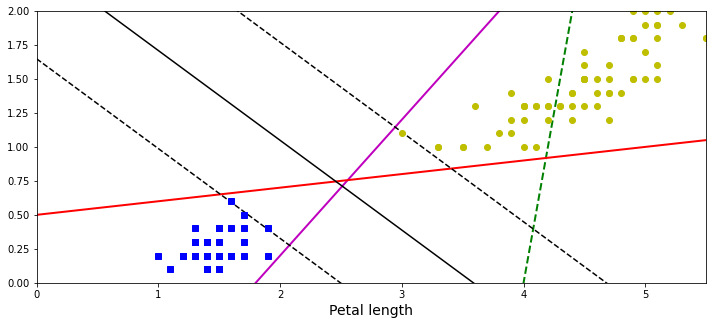

In [55]:
xx = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(ax, svm_clf, xx):
    w = svm_clf.coef_[0]
    a = -w[0] / w[1]
    yy = a * xx - (svm_clf.intercept_[0]) / w[1]
    
    margin = 1 / np.sqrt(np.sum(svm_clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    ax.plot(xx, yy, 'k-')
    ax.plot(xx, yy_down, 'k--')
    ax.plot(xx, yy_up, 'k--')

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot()
ax.plot(x0, pred_1, "g--", linewidth = 2, label='Separazione 1')
ax.plot(x0, pred_2, "m-", linewidth = 2, label='Separazione 2')
ax.plot(x0, pred_3, "r-", linewidth = 2, label='Separazione 3')
plot_svc_decision_boundary(ax, svm_clf, xx)
ax.plot(X_iris_2[:, 0][y_iris_2==1], X_iris_2[:, 1][y_iris_2==1], "bs")
ax.plot(X_iris_2[:, 0][y_iris_2==0], X_iris_2[:, 1][y_iris_2==0], "yo")
ax.set_xlabel("Petal length", fontsize=14)
ax.axis([0, 5.5, 0, 2])

Le due classi sono linearmente separabili e esiste un ricco insieme di iperpiano separatori, tra cui quelli rossi e viola in figura. Tuttavia le ultime sono molto vicine alle classi del training set, ponendo limitazioni sulle performance sul validationa e test set. In neretto sono stati riportati 
l'iperpiano identificato da SVM e i margini identificati.

Nel caso del dataset Iris, la separazione e' ben evidente, cosi' come la la classificazione mediante hard margin e support vector. Nel caso di un sottoinsieme di feature del nostro dataset di esempio, si ottengono risultati molto meno significativi.

In [57]:
X_subset = X[:,[20,27]]
# SVM Classifier model
svm_clf = LinearSVC(C=1, max_iter=50000)
svm_clf.fit(X_subset, y)

LinearSVC(C=1, max_iter=50000)

[-1.32693191 -1.32693191 -1.32693191 ...  0.65203194  0.65203194
 -0.33744998]


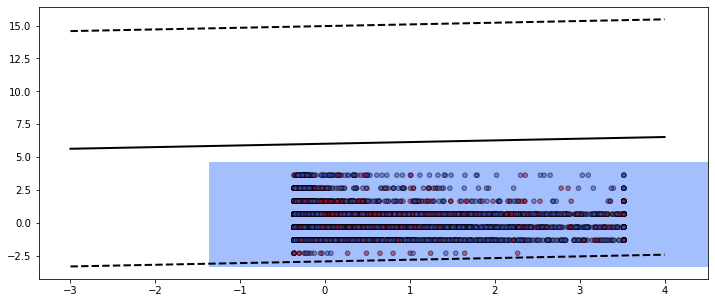

In [56]:
ax = plt.figure(figsize=(12,5)).add_subplot()
plot_decision(ax, svm_clf, X_subset, y ,cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X_subset[:, 0], X_subset[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k', alpha=0.5)
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]
x0 = np.linspace(-3, 4, 200)
iperpiano_sep = -w[0]/w[1] * x0 - b/w[1]
margine = 1/w[1]
margine_up = iperpiano_sep + margine
margine_down = iperpiano_sep - margine
ax.plot(x0, iperpiano_sep, "k-", lw=2)
plt.plot(x0, margine_up, "k--", lw=2)
plt.plot(x0, margine_down, "k--", lw=2)

Il metodo di hard margin classification funziona solamente se le classi sono linearmente separabili ed e' sensibile agli outlier.<br>
Nell'esempio vediamo l'effetto di instanze outlier.

(-2.0, 2.0, -2.0, 2.0)

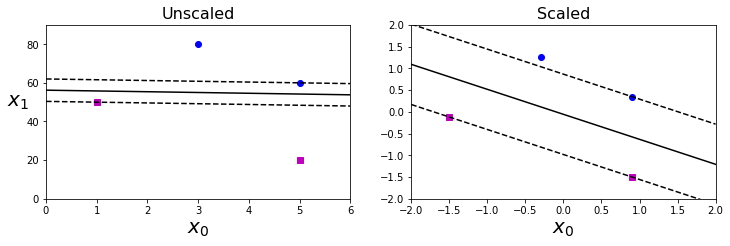

In [61]:
#Dataset esempio con outlier
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
#Training
svm_clf = SVC(kernel='linear',C=100)
svm_clf.fit(Xs, ys)

fig = plt.figure(figsize=(12,3.2))
ax1 = fig.add_subplot(121)
ax1.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
ax1.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(ax1, svm_clf, np.linspace(0,6,100))
ax1.set_xlabel("$x_0$", fontsize=20)
ax1.set_ylabel("$x_1$  ", fontsize=20, rotation=0)
ax1.set_title("Unscaled", fontsize=16)
ax1.axis([0, 6, 0, 90])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)
ax2 = fig.add_subplot(122)
ax2.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
ax2.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(ax2, svm_clf, np.linspace(-2,2,100))
ax2.set_xlabel("$x_0$", fontsize=20)
ax2.set_title("Scaled", fontsize=16)
ax2.axis([-2, 2, -2, 2])

Per questo vengono introdotte nel modello le variabilie di slack che misurano il livello di violazione del margine. Si deve quindi ottimizzare il margine e allo stesso stempo ridurre il numero di violazioni - interessi contropposti.

Attraverso il parametro $C$ posso controllare il trade-off ampiezza del margine e numero di violazioni. Se diminuisco il valore di C privilegio il margine e aumento il numero di violazioni, evitando piu' probabilmente overfitting. Se aumento C ho la situazione opposta e posso incappare piu' facilmente in overfitting.

Nel caso delle carte di credito, l'effetto del parametro C non e' molto apprezzabile, se non ininfluente.

0 0.01
Training per 0.01 finito
1 1
Training per 1 finito
2 50
Training per 50 finito


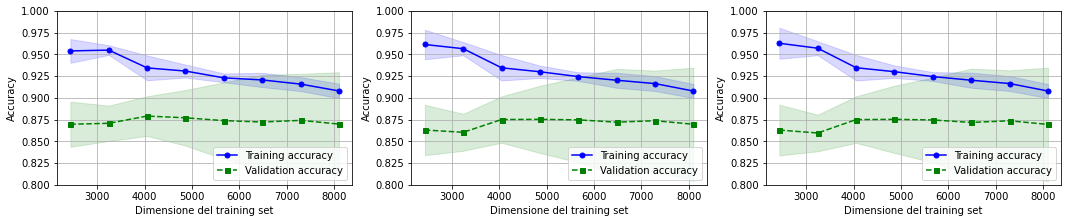

In [70]:
Cs = [0.01, 1, 50]
fig = plt.figure(figsize=(18,3.2))
for i, c in enumerate(Cs):
    print(i,c)
    clf = LinearSVC(C=c, max_iter=50000)
    train_sizes, train_scores, test_scores = learning_curve(clf,
                                                       X=X,
                                                       y=y,
                                                       train_sizes=np.linspace(0.1,1.0,10),
                                                       cv=5,
                                                       n_jobs=-1)
    print('Training per {} finito'.format(c))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    ax = fig.add_subplot(130+(i+1))
    ax.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
    ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.8,1))
    ax.set_xlabel('Dimensione del training set')
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')

### Nonlinear SVM

Molti dataset non sono linearmente separabili. Un approccio per gestire la non linearita' e' la creazione di feature polinomiali. Il problema che introducendo feature polinomiali con alto grado del polinomio introduce un elevato numero di feature aggiuntive che rendono il processo di training computazionalmente oneroso. Nel caso delle SVM non esiste la necessita' di creare delle feature nuove dal momento che si puo' utilizzare il kernel trick (vedi formulazione duale del problema di ottimizzazione quadratica). Attraverso il kernel trick non ho un'esplosione di feature e posso introdurre non linearita'.

Vediamo come applicare SVM non lineari.

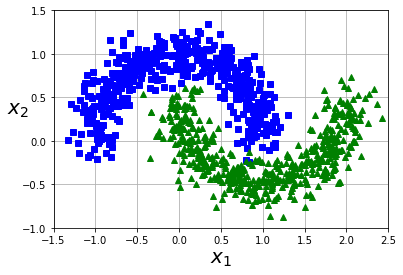

In [4]:
X_moon, y_moon = make_moons(n_samples=1000, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X_moon[:, 0][y_moon==0], X_moon[:, 1][y_moon==0], "bs")
    plt.plot(X_moon[:, 0][y_moon==1], X_moon[:, 1][y_moon==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X_moon, y_moon, [-1.5, 2.5, -1, 1.5])
plt.show()

In [6]:
poly3_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly3_kernel_svm_clf.fit(X_moon, y_moon)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

Posso aumentare il grado del polinomio ma potrei aumentare la probabilita' di overfitting

In [12]:
poly6_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=6, coef0=5, C=5))
    ])
poly6_kernel_svm_clf.fit(X_moon, y_moon)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=5, degree=6, kernel='poly'))])

Text(0.5, 1.0, '$d=10, r=5, C=5$')

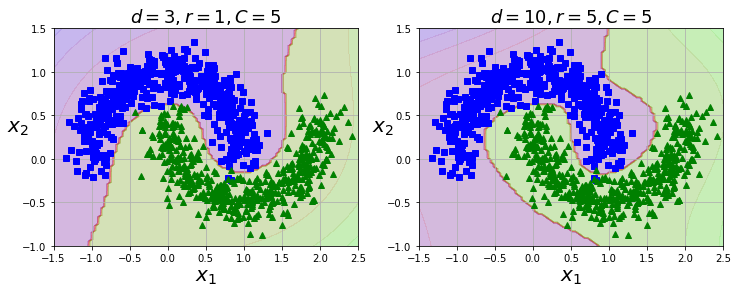

In [22]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plot_predictions(poly3_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moon, y_moon, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=5, C=5$", fontsize=18)

Il coefficiente _coef0_ amplifica gli effetti delle feature con alto degree. Anche in qeusto caso ha influenza su overfitting

In [19]:
poly6_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=6, coef0=1, C=5))
    ])
poly6_kernel_svm_clf.fit(X_moon, y_moon)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, degree=6, kernel='poly'))])

In [14]:
poly6_10_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=6, coef0=10, C=5))
    ])
poly6_10_kernel_svm_clf.fit(X_moon, y_moon)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=10, degree=6, kernel='poly'))])

Text(0.5, 1.0, '$d=6, r=10, C=5$')

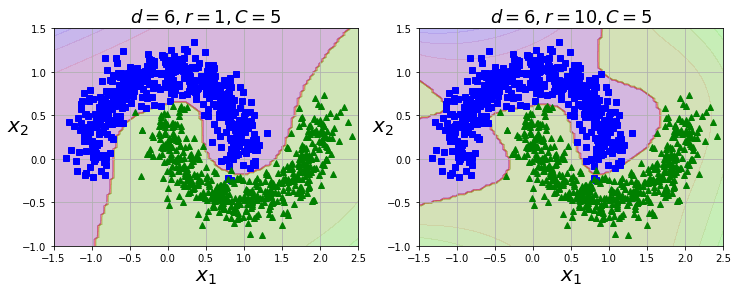

In [21]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plot_predictions(poly6_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moon, y_moon, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=6, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly6_10_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=6, r=10, C=5$", fontsize=18)

Una seconda opzione per gestire la non linearita' e' aggiungere feature calcolate utilizzando una funzione di similarita'che misura quanto un'istanza $\mathbf{x}$ e' simile ad un landmark $\mathbf{l}$. Per esempio, una funzione utilizzata e' Gaussian Radial Basis Function - RBF.
$$\phi(\mathbf{x},\mathbf{l}) = exp(-\gamma||\mathbf{x}-\mathbf{l}||^2)$$
Ottengo una forma a campana che assume valori tra 0 (punti distanti e dissimili) e 1 (punti uguali) con $\gamma$ che agisce sulla dispersione della campana. Diminuendo $\gamma$ aumento la dispersione e punti piu' lontani sono considerati piu' simili al landmark, rispetto ad un $\gamma$ piu' piccolo.

Nel nostro caso i landmark corrispondono a tutte le istanze del dataset - *m* - e se applicassi RBF senza kernel trick otterrei *m* features e di conseguenza una matrice *m* x *m*. 

Anche in questo caso vale il kernel trick e in SKL posso utilizzare la solita classe **SVC**.

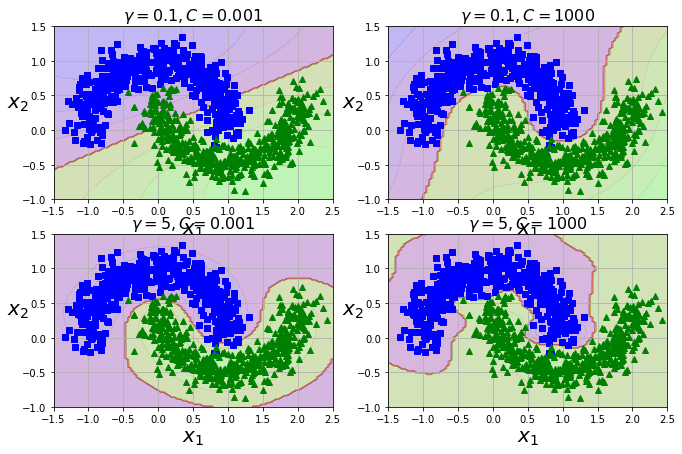

In [23]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X_moon, y_moon)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X_moon, y_moon, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

In [25]:
gamma1, gamma2 = 0.1, 2
C1, C2 = 0.01, 5
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

train_sizes, train_means, test_means, test_stds, train_stds = [],[],[],[],[]
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = SVC(kernel="rbf", gamma = gamma, C = C)
    train_size, train_scores, test_scores = learning_curve(rbf_kernel_svm_clf,
                                                       X=X,
                                                       y=y,
                                                       train_sizes=np.linspace(0.1,1.0,10),
                                                       cv=5,
                                                       n_jobs=-1)
    print('fatto {},{}'.format(gamma,C))
    train_means.append(np.mean(train_scores, axis=1))
    train_stds.append(np.std(train_scores, axis=1))
    test_means.append(np.mean(test_scores, axis=1))
    test_stds.append(np.std(test_scores, axis=1))
    train_sizes.append(train_size)

fatto 0.1,0.01
fatto 0.1,5
fatto 2,0.01
fatto 2,5


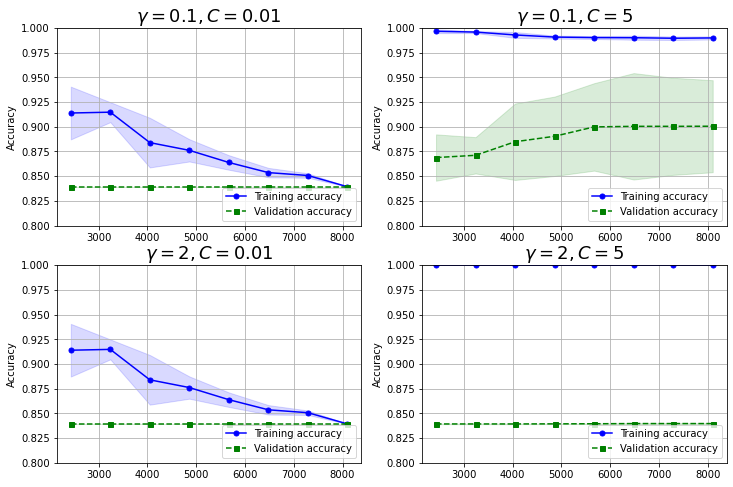

In [33]:
fig= plt.figure(figsize=(12, 8))
for i in range(4):
    ax = fig.add_subplot(221+i)
    ax.plot(train_sizes[i], train_means[i],
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes[i],
                 train_means[i] + train_stds[i],
                 train_means[i] - train_stds[i],
                 alpha=0.15, color='blue')
    ax.plot(train_sizes[i], test_means[i],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes[i],
                 test_means[i] + test_stds[i],
                 test_means[i] - test_stds[i],
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.8,1))
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')
    ax.set_title(r"$\gamma={}, C={}$".format(*hyperparams[i]), fontsize=18)

### Computational Complexity
**LinearSVC** utilizza la libreria liblinear che implementa un algoritmo ottimizzato per SVM lineari. La complessita' del training e' $O(mn)$ dove $m$ e' il numero di feature e $n$ il numero di istanze.

**SVC** utilizza la libreria libsvm e i tempi di computazione variano $O(m^2n)$ a $O(m^3n)$, rendendo SVM un classificatore per dataset complessi ma di dimensione piccola e media (max 100K istanze)

## Decision Tree
I decision tree sono un secondo strumento piuttosto versatile per problemi di classificazione e regressione. Inoltre sono una componente fondamentale per Random Forest. 
Decision Trees can perform both classification and regression. They are a fundamental components of Random Forests. Moreover they do not require feaure scaling.

Negli esempi utilizzeremo il dataset Iris per evidenziare le peculiarita' dell'approccio e il dataset delle carte di credito per testare le performance su un caso d'uso.

In [35]:
iris_data = load_iris()
X_iris = iris_data['data'][:,2:]
y_iris = iris_data["target"]

In SKL, i decision tree per la classificazione sono implementati dalla classe **DecisionTreeClassifier**. 

In [39]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

La struttura del decision tree addestrato e' visualizzabile mediante il metodo **export_graphviz()**, il quale crea un file .dot. E' possibile convertire il file .dot in immagine o pdf mediante l'utility Graphviz (https://graphviz.org/download/) e da prompt dei comandi digitare
```
dot -Tpng <file>.dot -o <file>.png


In [40]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris_data.feature_names[2:],
        class_names=iris_data.target_names,
        rounded=True,
        filled=True
    )

![](iris_tree.png)

### Making predictions
Uno dei vantaggi di DT e' la leggiblita' del modello (White Box) che indica come il classificatore esegue una predizione. Partendo dalla radice dell'albero, ci chiediamo se la lunghezza del petalo e' minore di 2.45. In caso positivo, ci spostiamo nel figlio sinistro, ed essendo una foglia restituiamo la classe del nodo. Nel caso di petalo con lunghezza maggiore di 2.45, dobbiamo verificare una secondo condizione sulla larghezza del petalo e in base alla misura prediciamo una classe rispetto all'altra.

L'attributo **samples** indica a quante istanze del training set si applica la condizione. La somma dei valori samples dei figli deve coincidere con il valore samples del padre. 

L'attributo **value** indica a quante istanze di una classe, si applica la condizione del nodo. La somma deve corrispondere al valore samples del nodo.

L'attributo **gini**  indica il valore di Gini impurity per quel nodo. Se $G = 0$, il nodo e' puro, quindi il nodo si applica ad una sola classe. 

**Gini impurity**
$$G_i = 1 - \sum_{k=1}^n p_{i,k}^2$$
dove $p_{i,k}$ e' il rapporto tra il numero di istanze della classe $k$ in quel nodo e il valore di sample del nodo $i$.

Possiamo anche definire le aree di decisione identificate

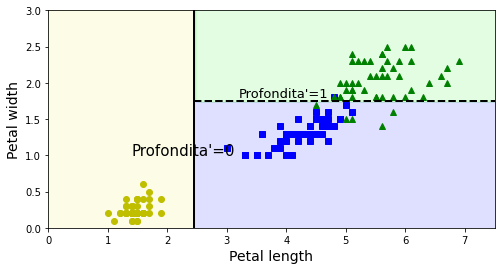

In [45]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X_iris, y_iris)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.40, 1.0, "Profondita'=0", fontsize=15)
plt.text(3.2, 1.80, "Profondita'=1", fontsize=13)

plt.show()

### Estimating class probabilities
Un DT stima anche la probabilita' che un'istanza appartenga alla classe $k$. Attraversa l'albero fino a giungere ad una foglia e restituisce la percentuale di elementi con classe $k$ presenti nel nodo. 

Per esempio:

In [46]:
print(tree_clf.predict_proba([[5, 1.5]]))
tree_clf.predict([[5, 1.5]])[0]

[[0.         0.90740741 0.09259259]]


1

In [47]:
49/54, 5/54

(0.9074074074074074, 0.09259259259259259)

## The CART training algorithm
SKL utilizza l'algoritmo Classification And Regression Tree (CART) per la fase di training. L'algoritmo prinva divide il training set in due sottoinsiemi basandosi sulla feature $k$ e una soglia $t_k$, individuando la coppia $(k, t_k)$ corrispondente al partizionamento piu' puro. La funzione costo che tenta di minimizzare e'
$$J(k,t_k) = \frac{m_{left}}{m}G_{left}+\frac{m_{right}}{m}G_{right}$$
dove $G_{\{.\}}$ misura l'impurita' dei sottoinsiemi di sinistra e destra and $m_{\{.\}}$ e' il numero di istanze a sinistra e destra.

Lo stesso meccanismo di ricerca della partizione migliore viene applicato ai sottoinsiemi trovati e la procedura prosegue in modo ricorsivo. 

Il partizionamento si ferma alla profondita' specificata da **max_depth**  o se non si trova una divisione che non riduce l'impurita'

**NB:** CART algorithm e' un algortimo greedy - non esegue backtracking. Non garantisce l'ottimalita' delle partizioni.


### Entropy or impurity
Di default, viene utilizzata la misura di Gini impurity, tuttavia e' possibile utilizzare l'entropia come misuar di impuriat'selezionando il parametro  **criterion** a "entropy". L'entropia di una partizione e' 0 quando contiene istanze di una sola classe.
$$H_{i} = - \sum_{k=1}^{n}p_{i,k}log(p_{i,k})$$

### Regularization Hyperparameters
DT utilizza poche assunzioni sui dati di training. Senza vincoli si adatta al training set e molto probabilmente presentera' il problema dell'overfitting. Per evitare overfitting si possono limitare i gradi di liberta' di un DT agendo sugli iperparametri. I parametri di regolarizzazione dipendono dall'algoritmo utilizzato per il training, tuttavia e' comune agire sulla profondita' massima dell'albero. In SKL la profondita' e' controllata da **max_depth**. Riducendo max_depth riduco la varianza aumentando il bias e riduco il rischio di overfitting.


**DecisionTreeClassifier** ha altri parametri che agiscono sulla forma dell'albero da apprendere: 
- **min_samples_split**: numero minimo istanze affinche' il nodo venga splittato
- **min_samples_leaf**: numero minimo di istanze in un nodo foglia,
- **min_weight_fraction_leaf**: stessa semantica del parametro precedente ma valutata sulla percentuale rispetto al numero totale di istanze nel training
- **max_leaf_nodes**: numero massimo di nodi foglia
- **max_features**: numero massimo di feature da valutare nel partizionamento del nodo

Aumentare i parametri min_ o ridurre i max_ regolarizza il modello.

Vediamo un esempio

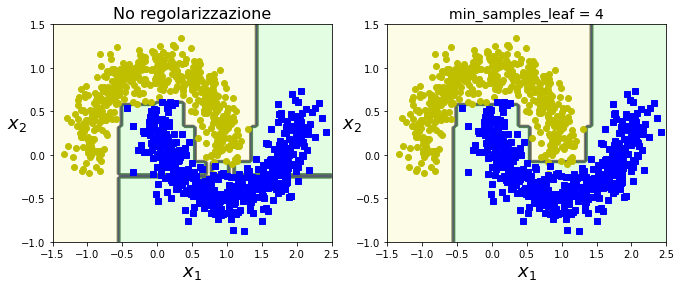

In [49]:
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(X_moon, y_moon)
deep_tree_clf2.fit(X_moon, y_moon)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, X_moon, y_moon, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No regolarizzazione", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, X_moon, y_moon, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

### Instability
A causa dell'alta varianza i DT sono sensibili a piccole variazioni del training set

Rimuovendo il valore piu' elevato di Iris-Versicolor (lunghezza petalo 4.8 cm e larghezza 1.8 cm wide) si ottiene un DT diverso

In [50]:
X_iris[(X_iris[:, 1]==X_iris[:, 1][y_iris==1].max()) & (y_iris==1)]

array([[4.8, 1.8]])

In [51]:
not_widest_versicolor = (X_iris[:, 1]!=1.8) | (y_iris==2)
X_tweaked = X_iris[not_widest_versicolor]
y_tweaked = y_iris[not_widest_versicolor]
print(X_tweaked.shape)
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

(149, 2)


DecisionTreeClassifier(max_depth=2, random_state=40)

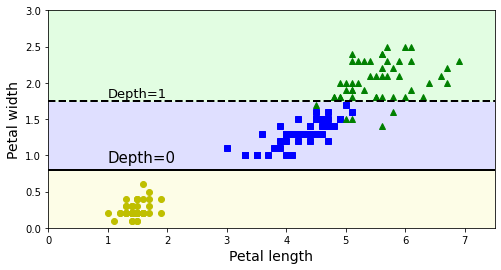

In [52]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.show()

In [58]:
min_leaf = [5, 10, 100, 200, 350]

train_sizes, train_means, test_means, test_stds, train_stds = [],[],[],[],[]
for mlf in min_leaf:
    dt_mlf = DecisionTreeClassifier(min_samples_leaf=mlf, random_state=42, max_depth=15)
    train_size, train_scores, test_scores = learning_curve(dt_mlf,
                                                       X=X,
                                                       y=y,
                                                       train_sizes=np.linspace(0.1,1.0,10),
                                                       cv=10,
                                                       n_jobs=-1)
    print('fatto {}'.format(mlf))
    train_means.append(np.mean(train_scores, axis=1))
    train_stds.append(np.std(train_scores, axis=1))
    test_means.append(np.mean(test_scores, axis=1))
    test_stds.append(np.std(test_scores, axis=1))
    train_sizes.append(train_size)

fatto 5
fatto 10
fatto 100
fatto 200
fatto 350


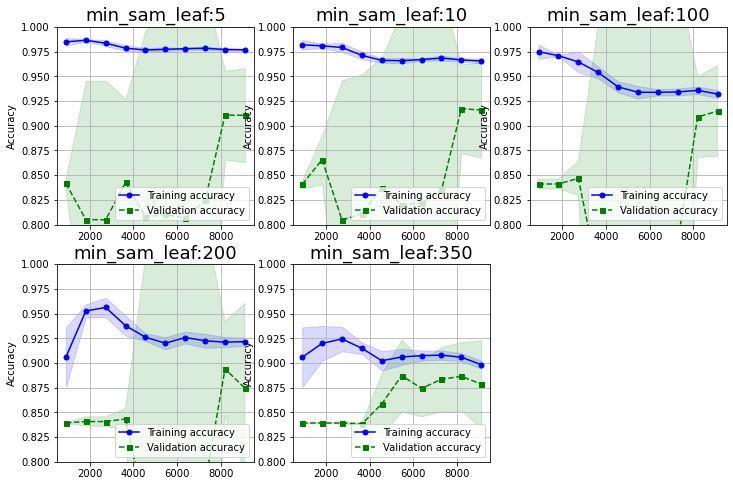

In [59]:
fig= plt.figure(figsize=(12, 8))
for i in range(5):
    ax = fig.add_subplot(231+i)
    ax.plot(train_sizes[i], train_means[i],
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes[i],
                 train_means[i] + train_stds[i],
                 train_means[i] - train_stds[i],
                 alpha=0.15, color='blue')
    ax.plot(train_sizes[i], test_means[i],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes[i],
                 test_means[i] + test_stds[i],
                 test_means[i] - test_stds[i],
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.8,1))
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')
    ax.set_title(r"min_sam_leaf:{}".format(min_leaf[i]), fontsize=18)

In [60]:
tree_card_clf = DecisionTreeClassifier(max_depth=15, min_samples_leaf=100, random_state=42)
tree_card_clf.fit(X, y)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=100, random_state=42)

In [63]:
export_graphviz(
        tree_card_clf,
        out_file="card_tree.dot",
        feature_names=columns_name,
        class_names=['Not Churn','Churn'],
        rounded=True,
        filled=True
    )